# Assignment - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_

But, if pressed, how would you **provide evidence**?

## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* OPTIONAL: Include a print log of each city as it's being processed with the city number and city name.
* OPTIONAL: Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must complete your analysis using a Jupyter notebook.
* You must use the Matplotlib ,Seaborn or Pandas plotting libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.

## Hints and Considerations

* The city data is generated based on random coordinates; as such, your outputs will not be an exact match to the provided starter notebook.

* You may want to start this assignment by refreshing yourself on the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm).

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

* A starter code for Citipy has been provided. However, if you're craving an extra challenge, push yourself to learn how it works: [citipy Python library](https://pypi.python.org/pypi/citipy). 

* Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!
#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Don't modify this cell.
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# Don't modify this cell
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

A lot of starter code has been generated for you. Use the cell below to play with the data to ensure you know what's happening. 

In [3]:
print(cities)

['jamestown', 'ushuaia', 'vila do maio', 'ngaoundere', 'kapaa', 'beyneu', 'dubbo', 'devarkonda', 'san quintin', 'barrow', 'albany', 'bubaque', 'rikitea', 'bluff', 'east london', 'honningsvag', 'necochea', 'starobaltachevo', 'catamarca', 'nikolskoye', 'ribeira grande', 'port alfred', 'wajima', 'balkanabat', 'port elizabeth', 'new norfolk', 'tuktoyaktuk', 'beringovskiy', 'saleaula', 'hasaki', 'amapa', 'jalu', 'matamoros', 'hermanus', 'kisangani', 'cabo san lucas', 'punta arenas', 'tasiilaq', 'lompoc', 'kodiak', 'castro', 'charters towers', 'umzimvubu', 'ulladulla', 'plettenberg bay', 'ostrovnoy', 'songea', 'raudeberg', 'saint-pierre', 'waingapu', 'lolua', 'temaraia', 'raduzhnyy', 'avarua', 'hilo', 'dakar', 'upernavik', 'klaksvik', 'altay', 'avera', 'bambous virieux', 'alta floresta', 'belushya guba', 'guerrero negro', 'saint george', 'butaritari', 'asau', 'bontang', 'airai', 'saint-philippe', 'samarai', 'devonport', 'karaul', 'scottsburgh', 'carnarvon', 'cape town', 'jiuquan', 'namibe', 

### Perform API Calls
* Perform a weather check on each city in `cities` using a series of successive API calls.
* OPTIONAL: Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
import time
# OpenWeatherMap API Key
api_key = api_keys.api_key

# base url for getting api data
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# example request
req = requests.get(base_url + f'&q={cities[0]}').json()

#Create empty list
city_data = []

# Your code here. A loop maybe? 
#NOTE: API calls can be slow. They can also be limited. Once you have a list try not to rerun all API calls very often. 

#Note from class: if/else would work, but try/except is better.
for i, city in enumerate(cities):
    
    try:
        city_url = base_url + f"&q={cities[i]}"
        print(city_url)
        request = requests.get(city_url).json()
              

        latitude = request["coord"]["lat"]
        longitude = request["coord"]["lon"]
        temperature = request["main"]["temp"]
        humidity = request["main"]["humidity"]
        cloudiness = request["clouds"]["all"]
        windspeed = request["wind"]["speed"]

       #city_data DOT append
        city_data.append({"City":city,
                        "latitude":latitude,
                        "longitude":longitude,
                        "temperature":temperature,
                        "humidity":humidity,
                        "cloudiness":cloudiness,
                        "wind speed":windspeed})
            
        print("working on city " + city)

    except Exception as e:
        print("city not found: " + city)
        print(e)
        
        pass
    
    time.sleep(1)

    
#locked out again!


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=jamestown
working on city jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=ushuaia
working on city ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=vila do maio
working on city vila do maio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=ngaoundere
working on city ngaoundere
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=kapaa
working on city kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=beyneu
working on city beyneu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=dubbo
working on city dubbo
http://api.openweathermap.org/data/2.5/weathe

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=avera
working on city avera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=bambous virieux
working on city bambous virieux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=alta floresta
working on city alta floresta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=belushya guba
city not found: belushya guba
'coord'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=guerrero negro
working on city guerrero negro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=saint george
working on city saint george
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=butaritari
working 

working on city la ronge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=tsihombe
city not found: tsihombe
'coord'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=vanimo
working on city vanimo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=muisne
working on city muisne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=kieta
working on city kieta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=vientiane
working on city vientiane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=nanortalik
working on city nanortalik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=omsukchan
working on city omsukchan
http://api.ope

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=trairi
working on city trairi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=sechura
working on city sechura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=namatanai
working on city namatanai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=hofn
working on city hofn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=najran
working on city najran
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=ceuasul-de campie
city not found: ceuasul-de campie
'coord'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=tilichiki
working on city tilichiki
http://api.openweathermap.org

working on city kloulklubed
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=elmadag
working on city elmadag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=shache
working on city shache
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=qandala
working on city qandala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=azimur
city not found: azimur
'coord'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=luanda
working on city luanda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=nelson bay
working on city nelson bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=chicama
working on city chicama
http://api.openweat

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=chuy
working on city chuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=lorengau
working on city lorengau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=lakes entrance
working on city lakes entrance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=clyde river
working on city clyde river
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=turtkul
city not found: turtkul
'coord'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=garwa
working on city garwa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=aguie
working on city aguie
http://api.openweathermap.org/data/2.

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=arraial do cabo
working on city arraial do cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=pop
working on city pop
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=katsuyama
working on city katsuyama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=longyearbyen
working on city longyearbyen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=yuancheng
working on city yuancheng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=morehead
working on city morehead
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=rocha
working on city rocha
http://api.openweathermap.org/d

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=srednekolymsk
working on city srednekolymsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=hilvarenbeek
working on city hilvarenbeek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=hirara
working on city hirara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=kachiry
working on city kachiry
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=manali
working on city manali
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=ahuimanu
working on city ahuimanu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=beian
working on city beian
http://api.openweathermap.org/data/2.5/

working on city alibag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=aporawan
city not found: aporawan
'coord'
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=lasa
working on city lasa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=pringsewu
working on city pringsewu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=vestmannaeyjar
working on city vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=iqaluit
working on city iqaluit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=kijang
working on city kijang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=broken hill
working on city broken hill
http

working on city dandong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=leh
working on city leh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=thinadhoo
working on city thinadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=forio
working on city forio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=carlsbad
working on city carlsbad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=sept-iles
working on city sept-iles
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=warah
working on city warah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=kariba
working on city kariba
http://api.openweathermap.org/data/2.5/

working on city touros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=kedrovyy
working on city kedrovyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=san vicente
working on city san vicente
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=fairbanks
working on city fairbanks
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=porto belo
working on city porto belo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=lucapa
working on city lucapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=talara
working on city talara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20c50570e15a88b47aaa7df2cf8b39e6&q=calvia
working on city calvia
http://api.openwea

In [5]:
#for reference:
#base_url = 'https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=' + api_key
#city = "st. louis"
#full_request = base_url + '&q='+city
#req = requests.get(full_request)
#print(req.text)

{"coord":{"lon":-90.1979,"lat":38.6273},"weather":[{"id":701,"main":"Mist","description":"mist","icon":"50d"}],"base":"stations","main":{"temp":49.66,"feels_like":47.39,"temp_min":48,"temp_max":51.01,"pressure":1015,"humidity":93},"visibility":9656,"wind":{"speed":5.75,"deg":280},"clouds":{"all":90},"dt":1618674425,"sys":{"type":1,"id":3689,"country":"US","sunrise":1618658469,"sunset":1618706338},"timezone":-18000,"id":4407066,"name":"St Louis","cod":200}


### Convert Raw Data to DataFrame
* OPTIONAL: Export the city data into a .csv.
* Display the DataFrame

In [6]:
df = pd.DataFrame(city_data)
df

,City,latitude,longitude,temperature,humidity,cloudiness,wind speed
0,jamestown,42.0970,-79.2353,40.75,87,90,8.05
1,ushuaia,-54.8000,-68.3000,53.60,54,75,16.11
2,vila do maio,15.1333,-23.2167,77.00,57,20,21.85
3,ngaoundere,7.3167,13.5833,76.01,61,100,3.78
4,kapaa,22.0752,-159.3190,64.00,59,96,1.01
...,...,...,...,...,...,...,...
547,xai-xai,-25.0519,33.6442,68.83,60,100,6.49
548,stange,60.7180,11.1942,56.93,28,0,8.05
549,manyava,48.6554,24.3754,50.00,57,75,2.24
550,verkhoyansk,67.5447,133.3850,10.65,76,91,12.12


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Use matplotlib
* OPTIONAL: Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

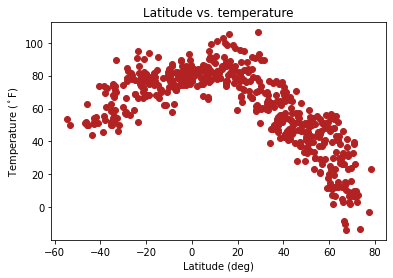

In [31]:
from matplotlib import cm
#put name of dataframe before each element
fig, ax = plt.subplots()
ax.scatter(df["latitude"],df["temperature"], color = "firebrick")
ax.set_title("Latitude vs. temperature")
ax.set_xlabel("Latitude (deg)")
ax.set_ylabel("Temperature ($^\circ$F)")
plt.show()
#add axes

#### Latitude vs. Humidity Plot

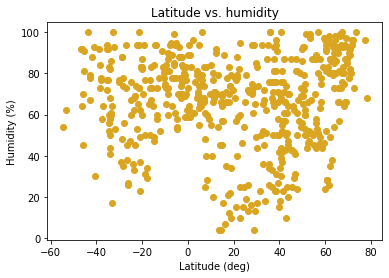

In [20]:
#put name of dataframe before each element
fig, ax = plt.subplots()
ax.scatter(df["latitude"],df["humidity"], color = "goldenrod")
ax.set_title("Latitude vs. humidity")
ax.set_xlabel("Latitude (deg)")
ax.set_ylabel("Humidity (%)")
plt.show()
#add axes

#### Latitude vs. Cloudiness Plot

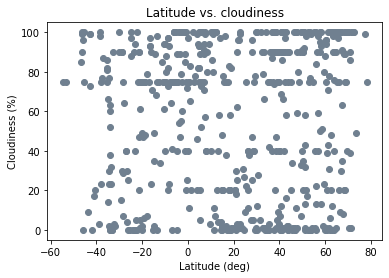

In [19]:
#put name of dataframe before each element
fig, ax = plt.subplots()
ax.scatter(df["latitude"],df["cloudiness"], color = "slategrey")
ax.set_title("Latitude vs. cloudiness")
ax.set_xlabel("Latitude (deg)")
ax.set_ylabel("Cloudiness (%)")
plt.show()
#add axes

#### Latitude vs. Wind Speed Plot

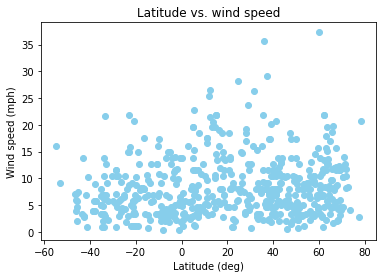

In [24]:
#put name of dataframe before each element
fig, ax = plt.subplots()
ax.scatter(df["latitude"],df["wind speed"], color = "skyblue")
ax.set_title("Latitude vs. wind speed")
ax.set_xlabel("Latitude (deg)")
ax.set_ylabel("Wind speed (mph)")
plt.show()
#add axes

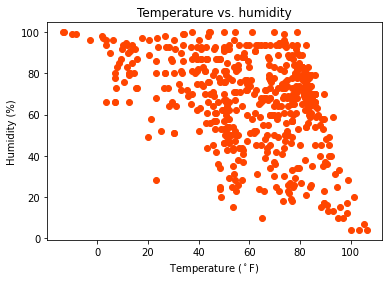

In [37]:
#put name of dataframe before each element
fig, ax = plt.subplots()
ax.scatter(df["temperature"],df["humidity"], color = "orangered")
ax.set_title("Temperature vs. humidity")
ax.set_xlabel("Temperature ($^\circ$F)")
ax.set_ylabel("Humidity (%)")
plt.show()
#add axes

### Use the Seaborn library to re-create 2-4 of the above plots. 
* Use the same data; just make a different plot.
* Note the differences in amount of code required to generate a similar plot.

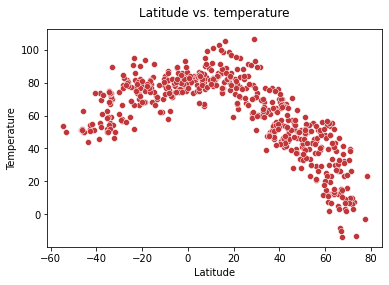

In [51]:
import seaborn as sns
sns.set_palette("RdBu")
g = sns.scatterplot(x="latitude", y="temperature", data=df)
g.set_title("Latitude vs. temperature",
           y=1.03)
g.set(xlabel="Latitude",
     ylabel="Temperature")
plt.show()

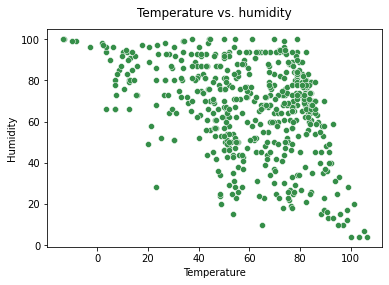

In [52]:
sns.set_palette("PRGn_r")
g = sns.scatterplot(x="temperature", y="humidity", data=df)
g.set_title("Temperature vs. humidity",
           y = 1.03)
g.set(xlabel="Temperature",
     ylabel="Humidity")
plt.show()

### As a Data-Scientist:
In addition to generating data, munging data, and plotting data, you will also be responsible for *interpreting* data. 
* Provide a written description of three observable trends based on the data.

In [34]:
#1: Predictably, temperature decreases as we move further from the equator in either direction. But from the data, we can see that the cities included on Open Weather Map extend further north than south. I would guess this means that settlements have been established further north than south. I looked this up, and it's true. There isn't any land mass between the tip of Chile and Antarctica, and the tip of Chile is not as far from the equator as far Northern Canada is.
#2: Much of the cloudiness data must be rounded to the nearest 2% or 5% or something... That seems like the only plausible explanation for the lines forming at about 0%, 20%, 40%, 75%, and 100%.
#3: It looked like there was a weak correlation between latitude and humidity, with temperatures getting more variable around -40 and 40 degrees. I'd expected higher humidity at latitudes close to the equator because of higher temperatures, so I ran a comparison of temperature and humidity. The humidity was pretty variable at 40 to 90 degrees F, but it was consistently high at sub-zero temperatures and consistently low at 100 degrees. Not at all what I'd anticipated! Maybe it's because at extremely low temperatures, it's snowy all the time, and at extremely high temperatures, it's arid deserts?

### OPTIONAL Homework Problem: 
* Use a **different** api endpoint such as `Hourly Forecast 4 days` to get data. 
* Other weather api endpoints are documented [here](https://openweathermap.org/api). 
* You will have to change the URL parameters to get the data you want. 
* Get the data into a data structure of your choice. (Pandas, dicts, lists etc...)
* Use the plotting library of your choice to make 1-4 plots of your choice. 